In [83]:
import matplotlib.pyplot as plt
import numpy as np

In [92]:
def spline(x,y):
  n=len(x)
  a={k: v for k,v in enumerate(y)}
  h={k:x[k+1]-x[k] for k in range(n-1)}


  A=[[1]+[0]*(n-1)]
  for i in range(1,n-1):
    row=[0]*n
    row[i-1]=h[i-1]
    row[i]=2*(h[i-1]+h[i])
    row[i+1]=h[i]
    A.append(row)
  A.append([0]*(n-1)+[1])
  B=[0]
  for k in range (1,n-1):
    row=3*(a[k+1]-a[k])/h[k]-3*(a[k]-a[k-1])/h[k-1]
    B.append(row)
  B.append(0)
  c=dict(zip(range(n),np.linalg.solve(A,B)))

  b={}
  d={}
  for k in range(n-1):
    b[k]=(1/h[k])*(a[k+1]-a[k])-(h[k]/3)*(2*c[k]+c[k+1])
    d[k]=(c[k+1]-c[k])/(3*h[k])

  s={}
  for k in range(n-1):
    eq=f'{a[k]}{b[k]:+}*(x-{x[k]}){c[k]:+}*(x-{x[k]})**2{d[k]:+}*(x-{x[k]})**3'
    s[k]={'eq':eq,'dominio':[x[k],x[k+1]]}


  return s



x=[1,2,4,5]
y=[1,4,2,3]


eqs=spline(x,y)
print(eqs)

{0: {'eq': '1+3.875*(x-1)+0.0*(x-1)**2-0.875*(x-1)**3', 'dominio': [1, 2]}, 1: {'eq': '4+1.25*(x-2)-2.625*(x-2)**2+0.75*(x-2)**3', 'dominio': [2, 4]}, 2: {'eq': '2-0.25*(x-4)+1.875*(x-4)**2-0.625*(x-4)**3', 'dominio': [4, 5]}}


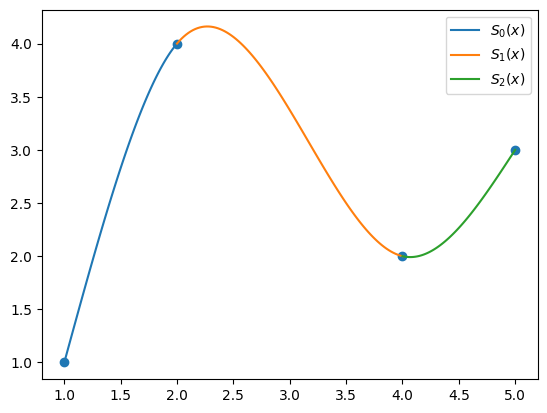

In [93]:

#GRAFICA
for key, value in eqs.items():
  def p(x):
    return eval(value['eq'])
  t=np.linspace(*value['dominio'],100)
  plt.plot(t,p(t),label=f"$S_{key}(x)$")

plt.scatter(x,y)
plt.legend()
plt.savefig('spline.png')